# Propheto: Iris Classification Example Notebook
-----------



## Content
* [Install Packages](#2)

## Overview

This is the overview

## Signup for accounts

If you havent already be sure you signup for an account with AWS and with Propheto. 

For this demonstration, you will be able to use the free tier that is offered by AWS but if you havent signed up with them yet, you will need to create an account and provide credit card information, all of which can be done at https://portal.aws.amazon.com/billing/signup#/start ![alt text](portal.aws.amazon.com_billing_signup.png)

You will also need to sign up for a Propheto account. Your Propheto account allows you to view and manage your  at https://app.getpropheto.com ![alt text](app.getpropheto.com_auth_type=sign-up.png)

## Install Packages
#### Install AWS CLI 
In order to use Propheto, you need to have the AWS CLI configured with your AWS Credentials. Download AWS CLI from the following location https://docs.aws.amazon.com/cli/latest/userguide/cli-chap-install.html if you havent already then Configure the AWS CLI in your development environment https://docs.aws.amazon.com/cli/latest/userguide/cli-chap-configure.html

#### Install propheto python package
Install the propheto python package using `pip install propheto`

In [1]:
!pip install propheto

     |████████████████████████████████| 54 kB 861 kB/s eta 0:00:011
  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
  Using cached boto3-1.18.57-py3-none-any.whl (131 kB)
  Using cached pydantic-1.8.2-cp38-cp38-manylinux2014_x86_64.whl (13.7 MB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached troposphere-3.0.3-py3-none-any.whl (238 kB)
  Using cached s3transfer-0.5.0-py3-none-any.whl (79 kB)
  Using cached botocore-1.21.57-py3-none-any.whl (8.0 MB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Using cached idna-3.2-py3-none-any.whl (59 kB)
  Using cached charset_normalizer-2.0.6-py3-none-any.whl (37 kB)
  Using cached cfn_flip-1.3.0-py3-none-any.whl (21 kB)
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Propheto Package
from propheto import Propheto

# Instanciate Propheto with new project name, description, version number and credential details
propheto = Propheto(
    name="Sample Propheto Project - Iris classification", # Project Name
    description="This is my sample Propheto project with the iris dataset", # Project Description 
    version="0.1.0", # Version for Project/API
    experiment="Initial experiment",  # Details for experiment or experiment version 
    # Authentication username/password
    credentials={
        "email": USER_EMAIL_ADDRESS, 
        "password": USER_PASSWORD
    }, 
    profile_name="default" # Optional AWS profile name. Can use "default"
)
propheto

<IPython.core.display.Javascript object>

Created project directory...


Propheto(id=Md3rk3O86wh3vWtSZ6PG, project_name=Sample Propheto Project - Iris classification, version=0.1.0)

### EXTRACT AND LOAD DATA

In [4]:
# LOAD IRIS DATASET
iris = datasets.load_iris(as_frame=True)
iris_data = iris['data']
iris_target = iris['target']
iris_df = pd.concat([iris_data, iris_target], axis=1)
propheto.log('data-sample', iris_df.head(), type='table', annotate="Sample records processed")
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

#### Log sample information back into Propheto

In [5]:
propheto.log('data-desc', iris_df.describe(), type='table', annotate="Description of the data being processed")
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

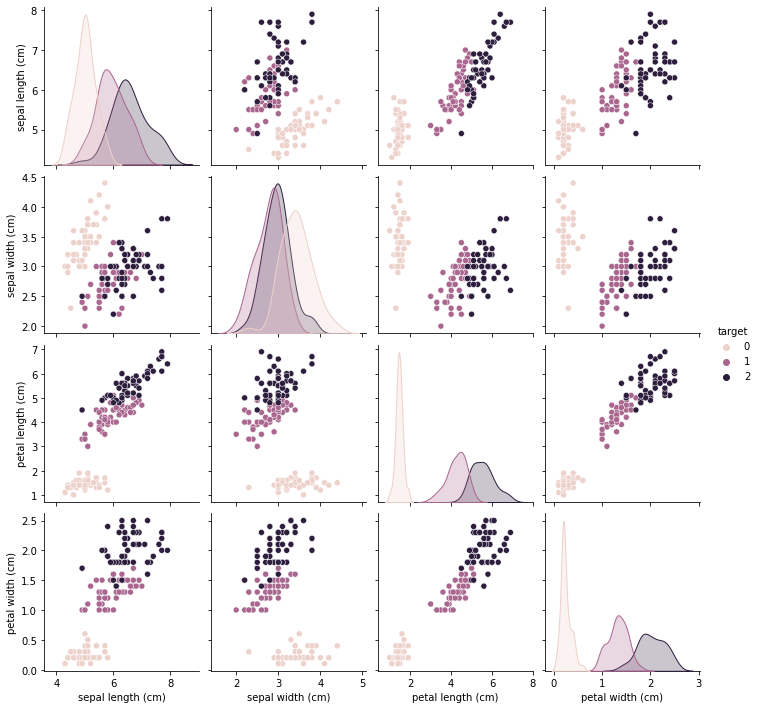

In [6]:
sns.pairplot(iris_df, hue='target')
propheto.log('iris-pairplot', plt, type='plot', annotate='pairplot iris df')
plt.show()

## Train Model

In [7]:
y = iris_df.pop('target')

# Just training on the first two features
X = iris_df[iris.feature_names[:2]].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
#clf = SVC()
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X_train, y_train)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.001, max_iter=100)

## Evaluate Model Performance

In [9]:
target_names = iris.target_names
y_pred = clf.predict(X_test)
y_true = y_test
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.68      0.81        19
  versicolor       0.39      0.60      0.47        15
   virginica       0.57      0.50      0.53        16

    accuracy                           0.60        50
   macro avg       0.65      0.59      0.61        50
weighted avg       0.68      0.60      0.62        50



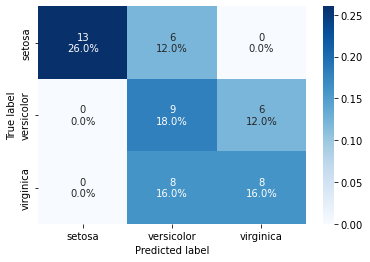

In [10]:
cf_matrix = confusion_matrix(y_true, y_pred)

cf_percents = cf_matrix/np.sum(cf_matrix)

annotations = []
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        v1 = cf_matrix[i][j]
        v2 = cf_percents[i][j]*100
        _annotate = f"{v1}\n{v2}%".strip()
        annotations.append(_annotate)
annotations = np.array(annotations).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

sns.heatmap(
    cf_matrix/np.sum(cf_matrix), 
    annot=annotations, 
    fmt='', 
    cmap='Blues', 
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)

plt.ylabel('True label')
plt.xlabel('Predicted label')

propheto.log('Confusion-matrix', plt, type='plot', annotate='Test confusion matrix')
plt.show()

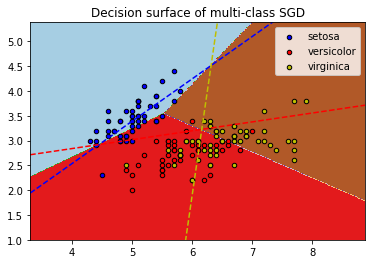

In [11]:
colors = "bry"

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

# create a mesh to plot in
X = iris['data'].values[:, :]
y = iris.target.values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()

propheto.log('pred-contor-plot', plt, type='plot', annotate='Decision Boundry')
plt.show()

## Deploy Model

In [12]:
propheto.deploy(clf, target='aws')

<IPython.core.display.Javascript object>

Created ECR Repository...
Created S3 bucket...
model.sav
Uploading SampleProphetoProject-Irisclassification/model.sav (1.0KiB)..


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1.03k/1.03k [00:00<00:00, 12.2kB/s]


Uploaded ML model...
Uploading SampleProphetoProject-Irisclassification/logs/propheto-log-data-sample.json (1017.0B)..


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1.02k/1.02k [00:00<00:00, 11.6kB/s]


Uploading SampleProphetoProject-Irisclassification/logs/propheto-log-iris-pairplot.json (212.3KiB)..


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 217k/217k [00:00<00:00, 738kB/s]


Uploading SampleProphetoProject-Irisclassification/logs/propheto-log-Confusion-matrix.json (19.5KiB)..


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 19.9k/19.9k [00:00<00:00, 229kB/s]


Uploading SampleProphetoProject-Irisclassification/logs/propheto-log-data-desc.json (1.6KiB)..


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1.61k/1.61k [00:00<00:00, 17.6kB/s]


Uploading SampleProphetoProject-Irisclassification/logs/propheto-log-pred-contor-plot.json (32.1KiB)..


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 32.9k/32.9k [00:00<00:00, 392kB/s]


Uploaded local logs
Generated App Service...
Creating Dockerfile...
Creating requirements...
Creating buildspec...
Zipped service...
Uploading SampleProphetoProject-Irisclassification/lambda.zip (4.5KiB)..


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 4.62k/4.62k [00:00<00:00, 55.6kB/s]


Uploaded zipped service...
Building image...
Build in progress... Status: IN_PROGRESS - 1/30
Build in progress... Status: IN_PROGRESS - 2/30
Build in progress... Status: IN_PROGRESS - 3/30
Build in progress... Status: IN_PROGRESS - 4/30
Build in progress... Status: IN_PROGRESS - 5/30
Build in progress... Status: IN_PROGRESS - 6/30
Build in progress... Status: IN_PROGRESS - 7/30
Build in progress... Status: IN_PROGRESS - 8/30
Build in progress... Status: IN_PROGRESS - 9/30
Build in progress... Status: SUCCEEDED - 10/30
Build completed successfully!
Function status Pending
Function status Pending
Function status Pending
Function status Pending
Function status Active
Created lambda function...
Created API...
https://vdtuwayc7h.execute-api.us-east-1.amazonaws.com/dev
Deployed API!


We can view details regarding what resources we created using the `propheto.config.to_dict()` command or by viewing our `propheto.config` file located in the `propheto-package` directory

In [ ]:
propheto.config.to_dict()

If we navigate to our dashboard we will be able to view details for our model and have a simple view to the logs that we created during our model training as well ![alt text](app.getpropheto.com_projects_=report.png)

## Delete Deployment
Once we finish with the deployment we can delete this and all our deployed resources in just a single `propheto.destroy()` command. 

In [13]:
propheto.destroy()

Destroying - ECR
Destroyed
Destroying - S3
Destroyed
Destroying - CodeBuild
Destroyed
Destroying - AWSLambda
Destroyed
Destroying - APIGateway
Destroyed
